In [40]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cbook import boxplot_stats  
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score, cross_val_predict
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.tree import DecisionTreeRegressor
from sklearn import ensemble
import numpy as np
import plotly.express as px 
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore")
import pickle

In [41]:
money_df = pd.read_csv("/content/ds_salaries.csv")

In [42]:
money_df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [43]:
money_df.shape

(607, 12)

In [44]:
money_df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


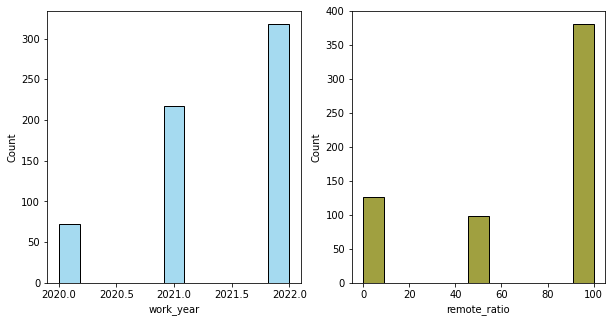

In [45]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.histplot( money_df['work_year'] , color="skyblue",ax=axes[0])
sns.histplot( money_df['remote_ratio'] , color="olive",ax=axes[1])
plt.show()

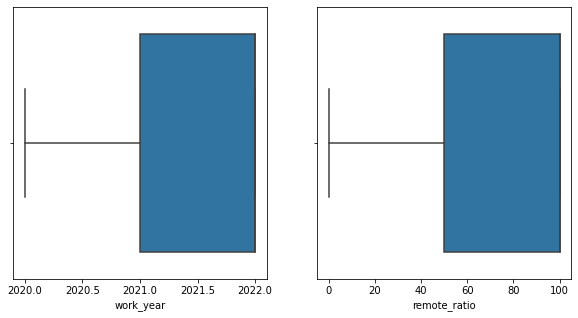

In [46]:
#Visualizing age column with a boxplot
fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.boxplot(x = 'work_year', data = money_df, ax=axes[0])
sns.boxplot(x = 'remote_ratio', data = money_df, ax=axes[1])
plt.show()

In [47]:
#Finding the outlier values in the bmi column
outlier_list = boxplot_stats(money_df.remote_ratio).pop(0)['fliers'].tolist()
print(outlier_list)

[]


In [48]:
#Finding the outlier values in the bmi column
outlier_list = boxplot_stats(money_df.work_year).pop(0)['fliers'].tolist()
print(outlier_list)

[]


In [49]:
#Finding the number of rows containing outliers
outlier_work_year_rows = money_df[money_df.work_year.isin(outlier_list)].shape[0]
print("Number of rows contaning outliers in work_year : ", outlier_work_year_rows)

Number of rows contaning outliers in work_year :  0


In [50]:
#Percentage of rows which are outliers
percent_work_year_outlier = (outlier_work_year_rows/money_df.shape[0])*100
print("Percentage of outliers in work_year columns : ", percent_work_year_outlier)

Percentage of outliers in work_year columns :  0.0


In [51]:
#Finding the number of rows containing outliers
outlier_experience_level_rows = money_df[money_df.experience_level.isin(outlier_list)].shape[0]
print("Number of rows contaning outliers in experience_level : ", outlier_experience_level_rows)

Number of rows contaning outliers in experience_level :  0


In [52]:
#Percentage of rows which are outliers
percent_experience_level_outlier = (outlier_experience_level_rows/money_df.shape[0])*100
print("Percentage of outliers in experience_level columns : ", percent_experience_level_outlier)

Percentage of outliers in experience_level columns :  0.0


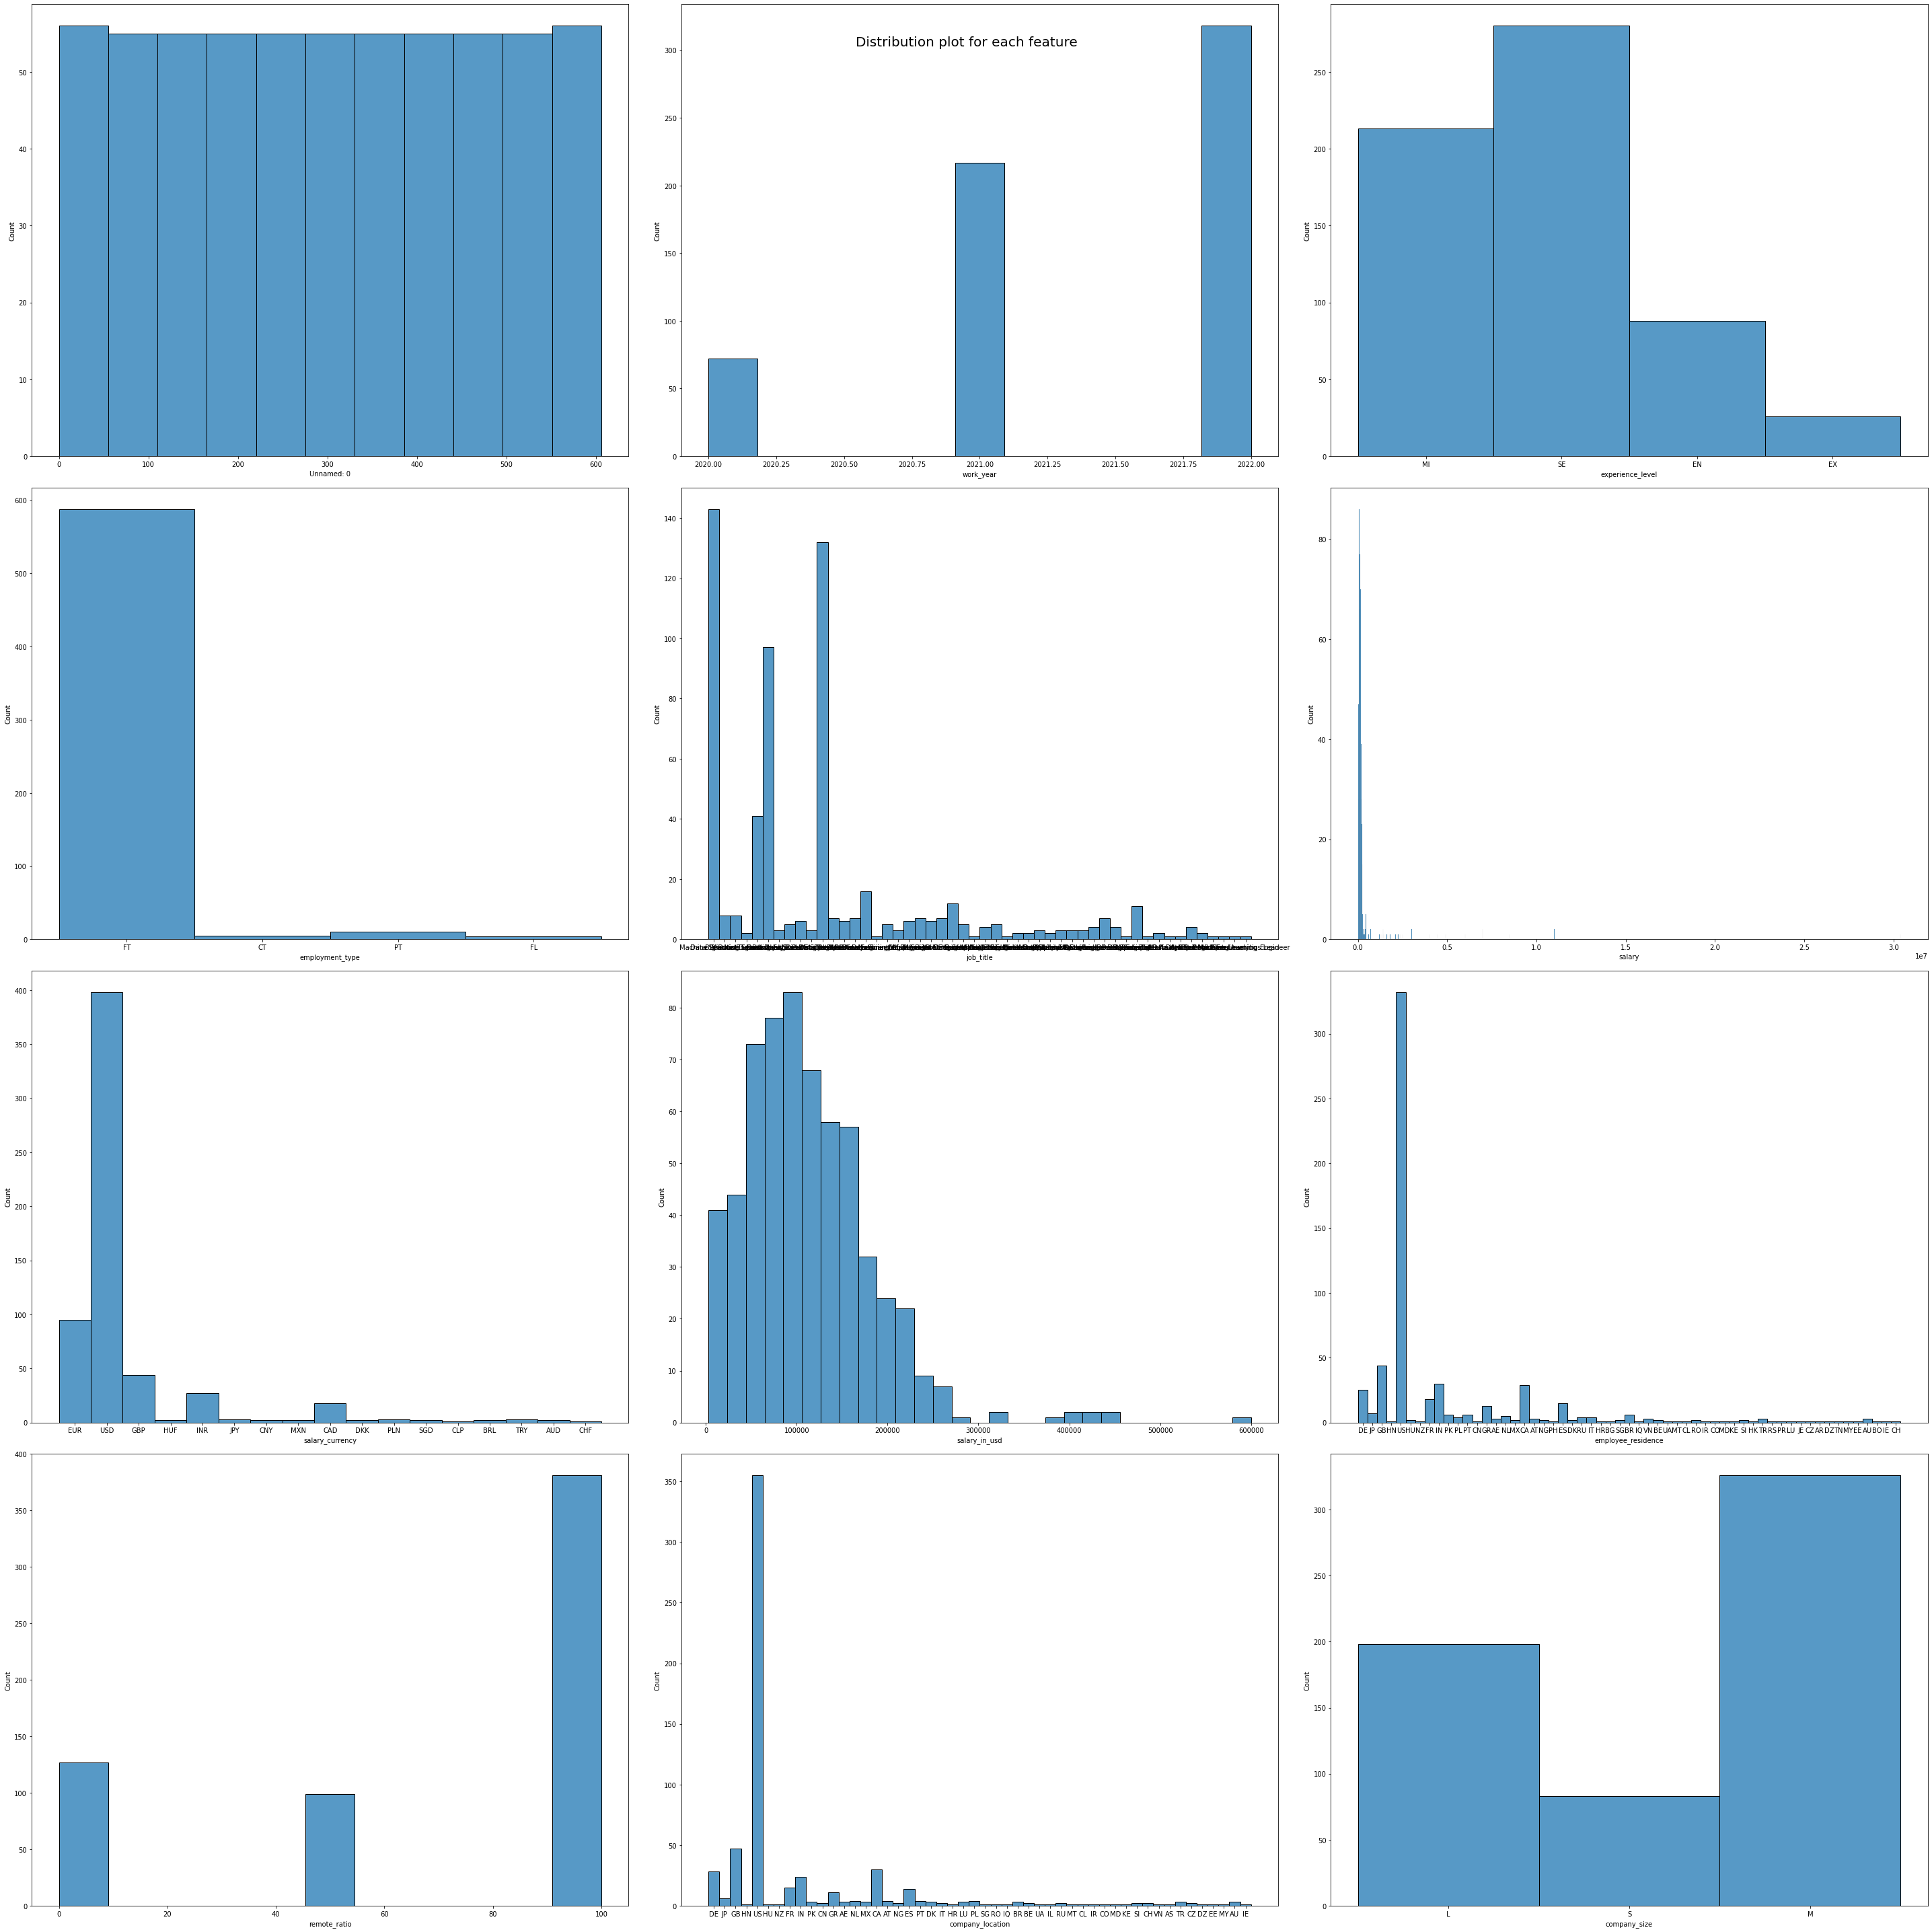

In [53]:
fig, axes = plt.subplots(4,3, figsize=(40,40))
axes = axes.ravel()
k = 0
for i in money_df.columns  :
    sns.histplot(data=money_df, x=i, ax=axes[k])
    k += 1 
fig.suptitle("Distribution plot for each feature", fontsize=20)
fig.tight_layout();

In [54]:
px.histogram(
    data_frame=money_df,
    x="salary_in_usd",
    nbins=60, # 10 width per each bin since range is from 0-600k
    marginal="box",
    title = "Salary(in USD) distribution",
)

In [55]:
#EN = Entry Level. SE = Senior. MI = Mid Level. EX = Executive-level / Director
px.box(
    data_frame=money_df,
    x="salary_in_usd",
    y="experience_level",
    color="experience_level",
    title = "Experience Vs Salary",
)

In [56]:
px.histogram(
    data_frame=money_df,
    x="salary_in_usd",
    color="remote_ratio",
    nbins=60,
    title="salary and remote ratio"
)

In [57]:
money_df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [58]:
fig,axes=plt.subplots(1,11,figsize=(400,100))
sns.countplot(x = 'work_year', data = money_df, palette = 'magma',ax=axes[0])
sns.countplot(x = 'employment_type', data = money_df, palette = 'magma',ax=axes[1])
sns.countplot(x = 'job_title', data = money_df, palette = 'magma',ax=axes[2])
sns.countplot(x = 'salary', data = money_df, palette = 'magma',ax=axes[3])
sns.countplot(x = 'salary_currency', data = money_df, palette = 'magma',ax=axes[4])
sns.countplot(x = 'salary_in_usd', data = money_df, palette = 'magma',ax=axes[5])
sns.countplot(x = 'employee_residence', data = money_df, palette = 'magma',ax=axes[6])
sns.countplot(x = 'remote_ratio', data = money_df, palette = 'magma',ax=axes[7])
sns.countplot(x = 'company_location', data = money_df, palette = 'magma',ax=axes[8])
sns.countplot(x = 'experience_level', data = money_df, palette = 'magma',ax=axes[9])



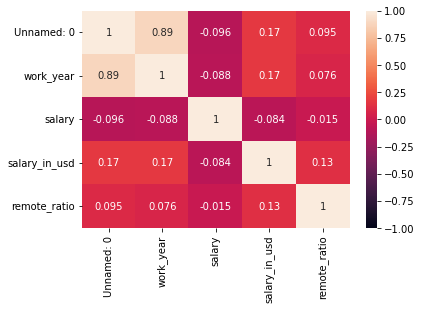

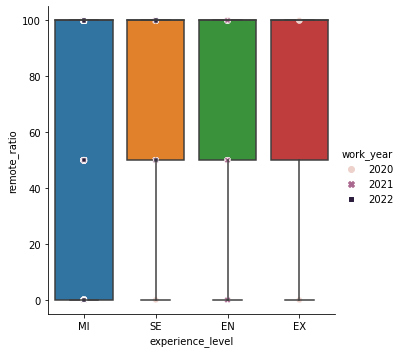

In [59]:
heatmap = sns.heatmap(money_df.corr(), vmin=-1, vmax=1, annot=True)
sns.relplot(x="job_title", y="remote_ratio",hue="work_year", style = "work_year", data=money_df);
sns.boxplot(x="experience_level", y="remote_ratio", data=money_df)

In [85]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [89]:
m = ols('salary ~ remote_ratio',money_df).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1291
Date:                Thu, 23 Jun 2022   Prob (F-statistic):              0.719
Time:                        00:11:47   Log-Likelihood:                -9510.6
No. Observations:                 607   AIC:                         1.903e+04
Df Residuals:                     605   BIC:                         1.903e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3.633e+05   1.26e+05      2.881   

In [92]:
m = ols('salary ~ remote_ratio + company_location + job_title + employment_type',money_df).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     30.01
Date:                Thu, 23 Jun 2022   Prob (F-statistic):          1.75e-160
Time:                        00:14:56   Log-Likelihood:                -8916.8
No. Observations:                 607   AIC:                         1.804e+04
Df Residuals:                     504   BIC:                         1.849e+04
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------